In [1]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from model import ShallowNet, MiniVGGNet

print('Tensorflow version: {}'.format(tf.__version__))

Tensorflow version: 1.12.0


In [2]:
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype(np.float) / 255.0
testX = testX.astype(np.float) / 255.0

# One-hot encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

print('Training data shape: {}'.format(trainX.shape))
print('Training labels shape: {}'.format(trainY.shape))
print('Test data shape: {}'.format(testX.shape))
print('Test labels shape: {}'.format(testY.shape))

labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

print("[INFO] compiling model...")
opt = SGD(
    lr=0.01,
    decay=0.01/40,
    momentum=0.9,
    nesterov=True
)
parameters = {
    'width':    32,
    'height':   32,
    'channels': 3,
    'classes':  10
}
#model = ShallowNet.build(parameters)
model = MiniVGGNet.build(parameters)
model.compile(
    loss="categorical_crossentropy",
    optimizer=opt,
    metrics=["accuracy"]
)
# Print model summary
model.summary()

[INFO] loading CIFAR-10 data...


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 10)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 10)
[INFO] compiling model...


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
__________

In [3]:
print("[INFO] training network...")
H = model.fit(
    trainX, trainY, 
    validation_data=(testX, testY),
    batch_size=32,
    epochs=50,
    verbose=1
)

[INFO] training network...


Train on 50000 samples, validate on 10000 samples
Epoch 1/50


   32/50000 [..............................] - ETA: 12:05 - loss: 4.2878 - acc: 0.0938

   64/50000 [..............................] - ETA: 6:57 - loss: 3.7861 - acc: 0.1094 

   96/50000 [..............................] - ETA: 5:12 - loss: 3.8666 - acc: 0.0938

  128/50000 [..............................] - ETA: 4:19 - loss: 3.7935 - acc: 0.0938

  160/50000 [..............................] - ETA: 3:51 - loss: 3.7722 - acc: 0.1062

  192/50000 [..............................] - ETA: 3:31 - loss: 3.6916 - acc: 0.1146

  224/50000 [..............................] - ETA: 3:16 - loss: 3.7017 - acc: 0.1161

  256/50000 [..............................] - ETA: 3:05 - loss: 3.6132 - acc: 0.1328

  288/50000 [..............................] - ETA: 2:58 - loss: 3.5327 - acc: 0.1597

  320/50000 [..............................] - ETA: 2:51 - loss: 3.4621 - acc: 0.1656

  352/50000 [..............................] - ETA: 2:45 - loss: 3.4865 - acc: 0.1676

  384/50000 [..............................] - ETA: 2:42 - loss: 3.4956 - acc: 0.1667

  416/50000 [..............................] - ETA: 2:39 - loss: 3.4313 - acc: 0.1731

  448/50000 [..............................] - ETA: 2:39 - loss: 3.3797 - acc: 0.1719

  480/50000 [..............................] - ETA: 2:40 - loss: 3.3660 - acc: 0.1750

  512/50000 [..............................] - ETA: 2:41 - loss: 3.3291 - acc: 0.1758

  544/50000 [..............................] - ETA: 2:39 - loss: 3.3119 - acc: 0.1783

  576/50000 [..............................] - ETA: 2:39 - loss: 3.3152 - acc: 0.1736

  608/50000 [..............................] - ETA: 2:36 - loss: 3.2768 - acc: 0.1760

  640/50000 [..............................] - ETA: 2:33 - loss: 3.2686 - acc: 0.1828

  672/50000 [..............................] - ETA: 2:31 - loss: 3.2715 - acc: 0.1875

  704/50000 [..............................] - ETA: 2:29 - loss: 3.2696 - acc: 0.1861

  736/50000 [..............................] - ETA: 2:27 - loss: 3.2499 - acc: 0.1875

  768/50000 [..............................] - ETA: 2:26 - loss: 3.2633 - acc: 0.1862

  800/50000 [..............................] - ETA: 2:24 - loss: 3.2744 - acc: 0.1837

  832/50000 [..............................] - ETA: 2:23 - loss: 3.2629 - acc: 0.1827

  864/50000 [..............................] - ETA: 2:21 - loss: 3.2344 - acc: 0.1863

  896/50000 [..............................] - ETA: 2:20 - loss: 3.2180 - acc: 0.1908

  928/50000 [..............................] - ETA: 2:19 - loss: 3.1676 - acc: 0.2015

  960/50000 [..............................] - ETA: 2:17 - loss: 3.1482 - acc: 0.2010

  992/50000 [..............................] - ETA: 2:16 - loss: 3.1543 - acc: 0.1986

 1024/50000 [..............................] - ETA: 2:15 - loss: 3.1162 - acc: 0.2041

 1056/50000 [..............................] - ETA: 2:14 - loss: 3.0931 - acc: 0.2064

 1088/50000 [..............................] - ETA: 2:14 - loss: 3.0588 - acc: 0.2114

 1120/50000 [..............................] - ETA: 2:13 - loss: 3.0374 - acc: 0.2188

 1152/50000 [..............................] - ETA: 2:12 - loss: 3.0295 - acc: 0.2179

 1184/50000 [..............................] - ETA: 2:11 - loss: 3.0270 - acc: 0.2204

 1216/50000 [..............................] - ETA: 2:10 - loss: 3.0183 - acc: 0.2212

 1248/50000 [..............................] - ETA: 2:09 - loss: 2.9998 - acc: 0.2244

 1280/50000 [..............................] - ETA: 2:09 - loss: 2.9873 - acc: 0.2250

 1312/50000 [..............................] - ETA: 2:08 - loss: 2.9735 - acc: 0.2264

 1344/50000 [..............................] - ETA: 2:07 - loss: 2.9545 - acc: 0.2277

 1376/50000 [..............................] - ETA: 2:07 - loss: 2.9474 - acc: 0.2260

 1408/50000 [..............................] - ETA: 2:06 - loss: 2.9323 - acc: 0.2301

 1440/50000 [..............................] - ETA: 2:05 - loss: 2.9217 - acc: 0.2306

 1472/50000 [..............................] - ETA: 2:05 - loss: 2.9091 - acc: 0.2310

 1504/50000 [..............................] - ETA: 2:04 - loss: 2.9104 - acc: 0.2301

 1536/50000 [..............................] - ETA: 2:04 - loss: 2.9233 - acc: 0.2285

 1568/50000 [..............................] - ETA: 2:03 - loss: 2.9261 - acc: 0.2283

 1600/50000 [..............................] - ETA: 2:03 - loss: 2.9337 - acc: 0.2269

 1632/50000 [..............................] - ETA: 2:02 - loss: 2.9323 - acc: 0.2249

 1664/50000 [..............................] - ETA: 2:02 - loss: 2.9246 - acc: 0.2266

 1696/50000 [>.............................] - ETA: 2:01 - loss: 2.9204 - acc: 0.2252

 1728/50000 [>.............................] - ETA: 2:01 - loss: 2.9102 - acc: 0.2245

 1760/50000 [>.............................] - ETA: 2:01 - loss: 2.9055 - acc: 0.2239

 1792/50000 [>.............................] - ETA: 2:01 - loss: 2.9047 - acc: 0.2238

 1824/50000 [>.............................] - ETA: 2:00 - loss: 2.8924 - acc: 0.2270

 1856/50000 [>.............................] - ETA: 2:00 - loss: 2.8889 - acc: 0.2268

 1888/50000 [>.............................] - ETA: 1:59 - loss: 2.8908 - acc: 0.2272

 1920/50000 [>.............................] - ETA: 1:59 - loss: 2.8882 - acc: 0.2271

 1952/50000 [>.............................] - ETA: 1:59 - loss: 2.8823 - acc: 0.2295

 1984/50000 [>.............................] - ETA: 1:58 - loss: 2.8807 - acc: 0.2293

 2016/50000 [>.............................] - ETA: 1:58 - loss: 2.8725 - acc: 0.2302

 2048/50000 [>.............................] - ETA: 1:58 - loss: 2.8687 - acc: 0.2290

 2080/50000 [>.............................] - ETA: 1:58 - loss: 2.8676 - acc: 0.2293

 2112/50000 [>.............................] - ETA: 1:57 - loss: 2.8652 - acc: 0.2292

 2144/50000 [>.............................] - ETA: 1:57 - loss: 2.8617 - acc: 0.2285

 2176/50000 [>.............................] - ETA: 1:57 - loss: 2.8562 - acc: 0.2302

 2208/50000 [>.............................] - ETA: 1:57 - loss: 2.8543 - acc: 0.2305

 2240/50000 [>.............................] - ETA: 1:56 - loss: 2.8408 - acc: 0.2326

 2272/50000 [>.............................] - ETA: 1:56 - loss: 2.8353 - acc: 0.2333

 2304/50000 [>.............................] - ETA: 1:56 - loss: 2.8424 - acc: 0.2322

 2336/50000 [>.............................] - ETA: 1:56 - loss: 2.8406 - acc: 0.2324

 2368/50000 [>.............................] - ETA: 1:56 - loss: 2.8324 - acc: 0.2344

 2400/50000 [>.............................] - ETA: 1:55 - loss: 2.8308 - acc: 0.2346

 2432/50000 [>.............................] - ETA: 1:55 - loss: 2.8287 - acc: 0.2340

 2464/50000 [>.............................] - ETA: 1:55 - loss: 2.8289 - acc: 0.2338

 2496/50000 [>.............................] - ETA: 1:55 - loss: 2.8226 - acc: 0.2332

 2528/50000 [>.............................] - ETA: 1:54 - loss: 2.8184 - acc: 0.2346

 2560/50000 [>.............................] - ETA: 1:54 - loss: 2.8116 - acc: 0.2348

 2592/50000 [>.............................] - ETA: 1:54 - loss: 2.8103 - acc: 0.2346

 2624/50000 [>.............................] - ETA: 1:54 - loss: 2.8124 - acc: 0.2348

 2656/50000 [>.............................] - ETA: 1:54 - loss: 2.8048 - acc: 0.2357

 2688/50000 [>.............................] - ETA: 1:53 - loss: 2.8028 - acc: 0.2359

 2720/50000 [>.............................] - ETA: 1:53 - loss: 2.8014 - acc: 0.2364

 2752/50000 [>.............................] - ETA: 1:53 - loss: 2.7971 - acc: 0.2366

 2784/50000 [>.............................] - ETA: 1:53 - loss: 2.7893 - acc: 0.2367

 2816/50000 [>.............................] - ETA: 1:53 - loss: 2.7852 - acc: 0.2383

 2848/50000 [>.............................] - ETA: 1:52 - loss: 2.7901 - acc: 0.2367

 2880/50000 [>.............................] - ETA: 1:52 - loss: 2.7821 - acc: 0.2375

 2912/50000 [>.............................] - ETA: 1:52 - loss: 2.7704 - acc: 0.2397

 2944/50000 [>.............................] - ETA: 1:52 - loss: 2.7755 - acc: 0.2385

 2976/50000 [>.............................] - ETA: 1:52 - loss: 2.7765 - acc: 0.2386

 3008/50000 [>.............................] - ETA: 1:51 - loss: 2.7744 - acc: 0.2397

 3040/50000 [>.............................] - ETA: 1:51 - loss: 2.7766 - acc: 0.2424

 3072/50000 [>.............................] - ETA: 1:51 - loss: 2.7689 - acc: 0.2438

 3104/50000 [>.............................] - ETA: 1:51 - loss: 2.7607 - acc: 0.2455

 3136/50000 [>.............................] - ETA: 1:51 - loss: 2.7639 - acc: 0.2462

 3168/50000 [>.............................] - ETA: 1:51 - loss: 2.7602 - acc: 0.2468

 3200/50000 [>.............................] - ETA: 1:50 - loss: 2.7577 - acc: 0.2466

 3232/50000 [>.............................] - ETA: 1:50 - loss: 2.7539 - acc: 0.2475

 3264/50000 [>.............................] - ETA: 1:50 - loss: 2.7483 - acc: 0.2500

 3296/50000 [>.............................] - ETA: 1:50 - loss: 2.7450 - acc: 0.2512

 3328/50000 [>.............................] - ETA: 1:50 - loss: 2.7408 - acc: 0.2515

 3360/50000 [=>............................] - ETA: 1:50 - loss: 2.7416 - acc: 0.2506

 3392/50000 [=>............................] - ETA: 1:50 - loss: 2.7357 - acc: 0.2521

 3424/50000 [=>............................] - ETA: 1:49 - loss: 2.7273 - acc: 0.2526

 3456/50000 [=>............................] - ETA: 1:49 - loss: 2.7226 - acc: 0.2532

 3488/50000 [=>............................] - ETA: 1:49 - loss: 2.7147 - acc: 0.2552

 3520/50000 [=>............................] - ETA: 1:49 - loss: 2.7221 - acc: 0.2540

 3552/50000 [=>............................] - ETA: 1:49 - loss: 2.7141 - acc: 0.2559

 3584/50000 [=>............................] - ETA: 1:49 - loss: 2.7093 - acc: 0.2575

 3616/50000 [=>............................] - ETA: 1:48 - loss: 2.7068 - acc: 0.2586

 3648/50000 [=>............................] - ETA: 1:48 - loss: 2.6991 - acc: 0.2590

 3680/50000 [=>............................] - ETA: 1:48 - loss: 2.6954 - acc: 0.2595

 3712/50000 [=>............................] - ETA: 1:48 - loss: 2.6951 - acc: 0.2605

 3744/50000 [=>............................] - ETA: 1:48 - loss: 2.6910 - acc: 0.2610

 3776/50000 [=>............................] - ETA: 1:48 - loss: 2.6871 - acc: 0.2619

 3808/50000 [=>............................] - ETA: 1:48 - loss: 2.6830 - acc: 0.2626

 3840/50000 [=>............................] - ETA: 1:48 - loss: 2.6840 - acc: 0.2630

 3872/50000 [=>............................] - ETA: 1:47 - loss: 2.6811 - acc: 0.2629

 3904/50000 [=>............................] - ETA: 1:47 - loss: 2.6801 - acc: 0.2638

 3936/50000 [=>............................] - ETA: 1:47 - loss: 2.6739 - acc: 0.2647

 3968/50000 [=>............................] - ETA: 1:47 - loss: 2.6756 - acc: 0.2656

 4000/50000 [=>............................] - ETA: 1:47 - loss: 2.6698 - acc: 0.2672

 4032/50000 [=>............................] - ETA: 1:47 - loss: 2.6737 - acc: 0.2664

 4064/50000 [=>............................] - ETA: 1:47 - loss: 2.6711 - acc: 0.2660

 4096/50000 [=>............................] - ETA: 1:47 - loss: 2.6670 - acc: 0.2668

 4128/50000 [=>............................] - ETA: 1:46 - loss: 2.6667 - acc: 0.2667

 4160/50000 [=>............................] - ETA: 1:46 - loss: 2.6653 - acc: 0.2666

 4192/50000 [=>............................] - ETA: 1:46 - loss: 2.6621 - acc: 0.2672

 4224/50000 [=>............................] - ETA: 1:46 - loss: 2.6616 - acc: 0.2668

 4256/50000 [=>............................] - ETA: 1:46 - loss: 2.6621 - acc: 0.2667

KeyboardInterrupt: 

[INFO] evaluating network...


              precision    recall  f1-score   support

    airplane       0.57      0.68      0.62      1000
  automobile       0.71      0.73      0.72      1000
        bird       0.48      0.39      0.43      1000
         cat       0.41      0.35      0.38      1000
        deer       0.60      0.45      0.51      1000
         dog       0.45      0.59      0.51      1000
        frog       0.66      0.70      0.68      1000
       horse       0.64      0.66      0.65      1000
        ship       0.71      0.73      0.72      1000
       truck       0.70      0.65      0.68      1000

   micro avg       0.59      0.59      0.59     10000
   macro avg       0.59      0.59      0.59     10000
weighted avg       0.59      0.59      0.59     10000



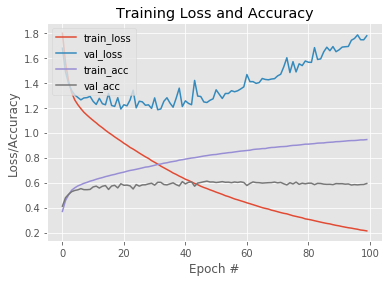

In [6]:
# Evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(
    testY.argmax(axis=1),
    predictions.argmax(axis=1),
    target_names=labelNames
))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [ ]:
# Save the network to disk
print("[INFO] serializing network...")
model.save(r'/home/share/models/cifar-10/shallownet.hdf5')